# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
data = pd.read_csv(r"C:\Users\Sarah\Downloads\Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data.shape

(440, 8)

In [6]:
data.dtypes
# nothing to convert

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
data.isnull().sum()
# no missing data

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.corr()
# only high correlation is Greocry - Detergents_Paper

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


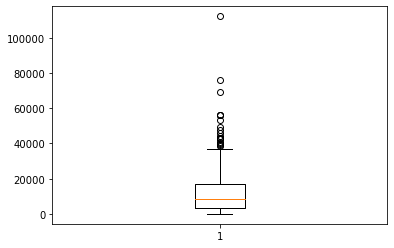

<Figure size 720x504 with 0 Axes>

In [9]:
#checking for outliers
plt.boxplot(data['Fresh'])
fig = plt.figure(figsize =(10, 7))
plt.show() 
#need to remove point over 80000
data.drop(data[data.Fresh > 80000].index, inplace=True)


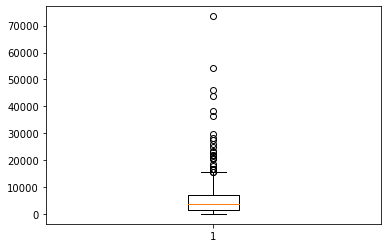

<Figure size 720x504 with 0 Axes>

In [10]:
plt.boxplot(data['Milk'])
fig = plt.figure(figsize =(10, 7))
plt.show() 
#need to remove outliers overs 50000
data.drop(data[data.Milk > 50000].index, inplace=True)


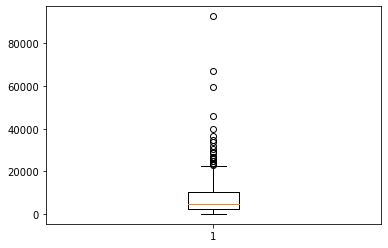

<Figure size 720x504 with 0 Axes>

In [11]:
plt.boxplot(data['Grocery'])
fig = plt.figure(figsize =(10, 7))
plt.show() 
# removing outliers over 80000
data.drop(data[data.Grocery > 80000].index, inplace=True)


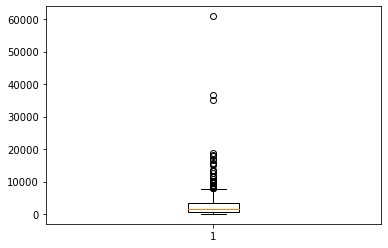

<Figure size 720x504 with 0 Axes>

In [12]:
plt.boxplot(data['Frozen'])
fig = plt.figure(figsize =(10, 7))
plt.show()
 #removing outliers over 30000
data.drop(data[data.Frozen > 50000].index, inplace=True)


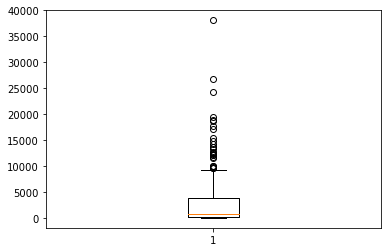

<Figure size 720x504 with 0 Axes>

In [13]:
plt.boxplot(data['Detergents_Paper'])
fig = plt.figure(figsize =(10, 7))
plt.show()
#removing outliers over 30000
data.drop(data[data.Frozen > 30000].index, inplace=True)

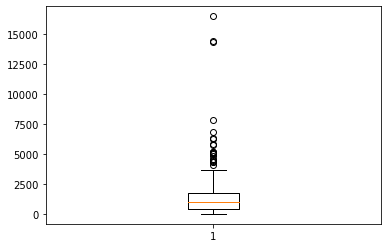

<Figure size 720x504 with 0 Axes>

In [14]:
plt.boxplot(data['Delicassen'])
fig = plt.figure(figsize =(10, 7))
plt.show()
#removing outliers over 10000
data.drop(data[data.Delicassen > 10000].index, inplace=True)

In [15]:
data.skew()
"""
· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
· If the skewness is less than -1 or greater than 1, the data are highly skewed
Globally the distribution is highly right skewed on all columns
"""

'\n· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical\n· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed\n· If the skewness is less than -1 or greater than 1, the data are highly skewed\nGlobally the distribution is highly right skewed on all columns\n'

In [16]:
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [18]:
# Your code here

In [19]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [20]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(data)
customers_scale = scaler.transform(data)
customers_scale

array([[ 1.4546278 ,  0.59702823,  0.10784778, ..., -0.77237506,
        -0.00895557,  0.04666713],
       [ 1.4546278 ,  0.59702823, -0.38134678, ..., -0.29802072,
         0.13683667,  0.40028966],
       [ 1.4546278 ,  0.59702823, -0.44271403, ..., -0.10098594,
         0.18935955,  5.29933421],
       ...,
       [ 1.4546278 ,  0.59702823,  0.27015717, ..., -0.70404107,
         2.85672147,  0.47375918],
       [-0.68746108,  0.59702823, -0.09952817, ..., -0.51987637,
        -0.59919035,  0.68205739],
       [-0.68746108,  0.59702823, -0.75356004, ..., -0.8180332 ,
        -0.526412  , -0.99159445]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [21]:
# Your code here:
#Using 2 clusters, assuming we are on Pareto principle of 80/20 distribution 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(customers_scale)
labels = kmeans.fit(customers_scale)
labels.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [22]:
data["labels"] = labels.labels_
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


Count the values in `labels`.

In [23]:
# Your code here:
data.labels.value_counts()

1    298
0    132
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [24]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN()
dbscan_cluster.fit(customers_scale)
dblabels = dbscan_cluster.fit(customers_scale)
dblabels.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1

In [25]:
data['dbscan_labels'] = dblabels.labels_

Count the values in `labels_DBSCAN`.

In [26]:
# Your code here
data.dbscan_labels.value_counts()

-1    330
 0     92
 1      8
Name: dbscan_labels, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

<function matplotlib.pyplot.show(close=None, block=None)>

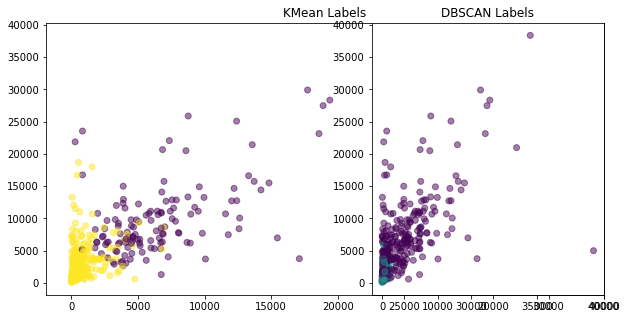

In [29]:
# Your code here:
fig = plt.figure(figsize=(10,5))

plot1 = fig.add_subplot(111)
plot1.scatter(data['Detergents_Paper'],data['Milk'], c=data.labels, alpha=0.5)
plot1.title.set_text('KMean Labels')

plot2 = fig.add_subplot(122)
plot2.scatter(data['Detergents_Paper'],data['Milk'], c=data.dbscan_labels, alpha=0.5)
plot2.title.set_text('DBSCAN Labels')

fig.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

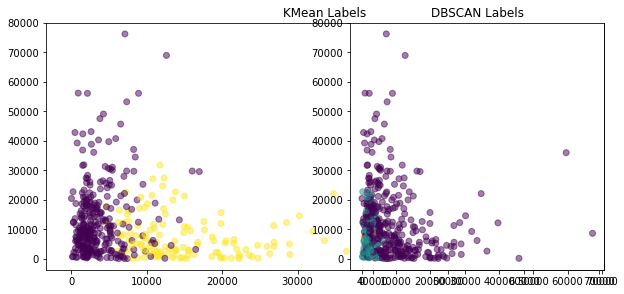

In [104]:
# Your code here:
fig = plt.figure(figsize=(10,10))
plot3 = fig.add_subplot(211)
plot3.scatter(data['Grocery'],data['Fresh'], c=data.labels, alpha=0.5)
plot3.title.set_text('KMean Labels')

plot4 = fig.add_subplot(222)
plot4.scatter(data['Grocery'],data['Fresh'], c=data.dbscan_labels, alpha=0.5)
plot4.title.set_text('DBSCAN Labels')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

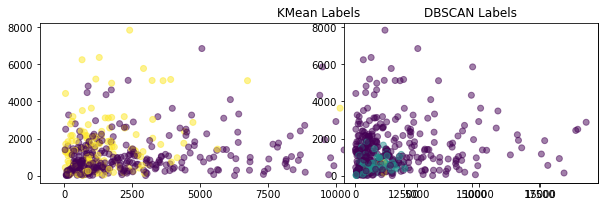

In [100]:
# Your code here:
fig = plt.figure(figsize=(10,10))

plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=data.labels, alpha=0.5)
plot5.title.set_text('KMean Labels')

plot6 = fig.add_subplot(322)
plot6.scatter(data['Frozen'],data['Delicassen'], c=data.dbscan_labels, alpha=0.5)
plot6.title.set_text('DBSCAN Labels')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [108]:
# Your code here:
k_m = data.groupby(['labels']).mean()
d_b = data.groupby(['dbscan_labels']).mean()
k_m , d_b

(         Channel    Region         Fresh          Milk       Grocery  \
 labels                                                                 
 0       1.030201  2.506711  13124.218121   3027.063758   3692.939597   
 1       1.977273  2.598485   7610.969697  10137.674242  16003.159091   
 
              Frozen  Detergents_Paper   Delicassen  dbscan_labels  
 labels                                                             
 0       3286.540268        761.322148  1106.546980      -0.637584  
 1       1488.409091       7115.878788  1672.227273      -1.000000  ,
                 Channel    Region         Fresh         Milk      Grocery  \
 dbscan_labels                                                               
 -1             1.418182  2.442424  12654.278788  6272.593939  9079.596970   
  0             1.000000  3.000000   7427.782609  1742.054348  2214.380435   
  1             1.000000  1.000000   7049.625000  1251.625000  1615.375000   
 
                     Frozen  Detergen

Which algorithm appears to perform better?

In [ ]:
# Your observations here
"""
KMean seems to perform better,
DBCSN has very little mean difference between clusters 0 and 1 , which doesn't seem very reliable"""


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

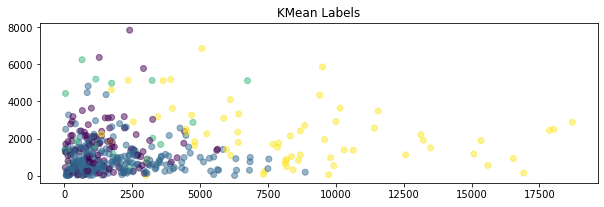

In [118]:
# Your code here
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_scale)
labels = kmeans.fit(customers_scale)
labels.labels_
customers = data
customers['kmean4'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.kmean4, alpha=0.5)
plot5.title.set_text('KMean Labels')
plt.show()

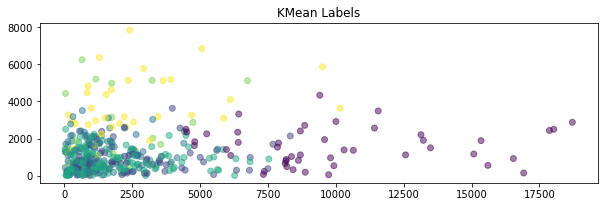

In [119]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(customers_scale)
labels = kmeans.fit(customers_scale)
labels.labels_
customers = data
customers['kmean6'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.kmean6, alpha=0.5)
plot5.title.set_text('KMean Labels')
plt.show()

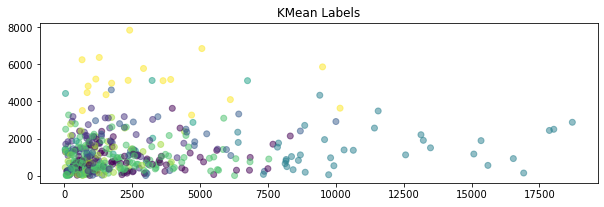

In [120]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(customers_scale)
labels = kmeans.fit(customers_scale)
labels.labels_
customers = data
customers['kmean8'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.kmean8, alpha=0.5)
plot5.title.set_text('KMean Labels')
plt.show()

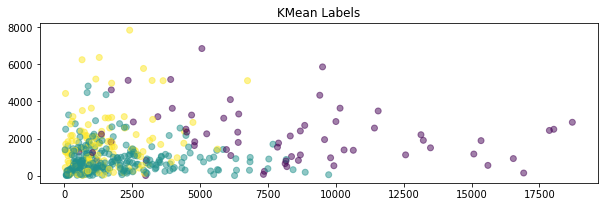

In [121]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers_scale)
labels = kmeans.fit(customers_scale)
labels.labels_
customers = data
customers['kmean3'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.kmean3, alpha=0.5)
plot5.title.set_text('KMean Labels')
plt.show()

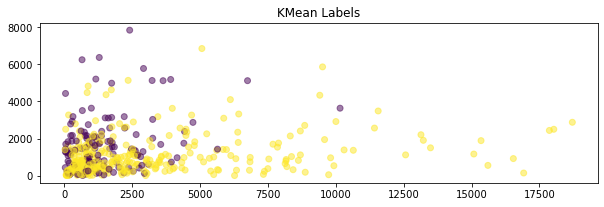

In [122]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(customers_scale)
labels = kmeans.fit(customers_scale)
labels.labels_
customers = data
customers['kmean2'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.kmean2, alpha=0.5)
plot5.title.set_text('KMean Labels')
plt.show()

In [ ]:
# Your comment here
"""
2 clusters seems to be the best fit 
"""

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

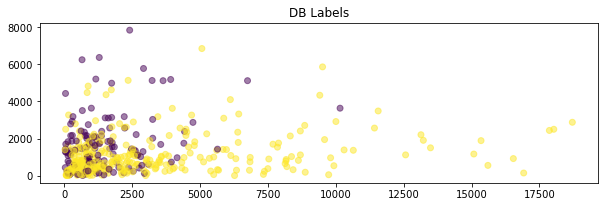

In [123]:
# Your code here
dbscan_cluster = DBSCAN(min_samples= 10)
dbscan_cluster.fit(customers_scale)
dblabels = dbscan_cluster.fit(customers_scale)
dblabels.labels_

customers['db10'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.db10, alpha=0.5)
plot5.title.set_text('DB Labels')
plt.show()

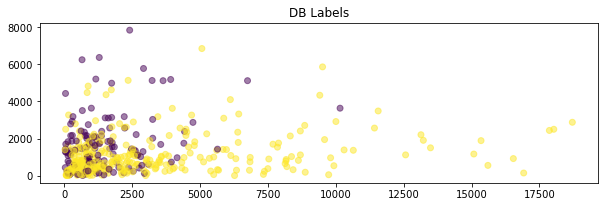

In [124]:
dbscan_cluster = DBSCAN(min_samples= 100)
dbscan_cluster.fit(customers_scale)
dblabels = dbscan_cluster.fit(customers_scale)
dblabels.labels_

customers['db100'] = labels.labels_

fig = plt.figure(figsize=(10,10))
plot5 = fig.add_subplot(311)
plot5.scatter(data['Frozen'],data['Delicassen'], c=customers.db100, alpha=0.5)
plot5.title.set_text('DB Labels')
plt.show()

In [ ]:
# Your comment here
#can't see any change ?